<a href="https://colab.research.google.com/github/cycling777/gpt3FineTuning/blob/main/GPT3_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-tune GPT-3 with Mental helth dataset

OpenAI’s API gives practitioners access to GPT-3, an incredibly powerful natural language model that can be applied to virtually any task that involves understanding or generating natural language.

If you use OpenAI's API to [fine-tune GPT-3](https://beta.openai.com/docs/guides/fine-tuning), you can now use the W&B integration to track experiments, models, and datasets in your central dashboard.

All it takes is one line: `openai wandb sync`

## Set up your API key

In [ ]:
# Enter credentials
%env OPENAI_API_KEY=sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxx

env: OPENAI_API_KEY=sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxx


**WARNING: Remove the API key after running the cell and clear output so it does not get logged to wandb in case you sync code (see settings)**

## Install dependencies

In [ ]:
!pip install -Uq openai wandb

In [ ]:
import openai
import wandb
from pathlib import Path
import pandas as pd
import numpy as np
import json
from tqdm import tqdm

In [ ]:
from google.colab import drive

# Mount Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# DownLaod demo data from here
https://www.kaggle.com/datasets/narendrageek/mental-health-faq-for-chatbot?resource=download
# Save the data on your drive at 'drive/My Drive/dataset/Mental_Health_FAQ.csv'
# Check Mental Health Dataset in drive is available

In [ ]:
pd.read_csv('drive/My Drive/dataset/Mental_Health_FAQ.csv')

Question_ID                                          Questions  \
0       1590140        What does it mean to have a mental illness?   
1       2110618                    Who does mental illness affect?   
2       6361820                        What causes mental illness?   
3       9434130  What are some of the warning signs of mental i...   
4       7657263            Can people with mental illness recover?   
..          ...                                                ...   
93      4373204            How do I know if I'm drinking too much?   
94      7807643  If cannabis is dangerous, why are we legalizin...   
95      4352464       How can I convince my kids not to use drugs?   
96      6521784  What is the legal status (and evidence) of CBD...   
97      3221856                    What is the evidence on vaping?   

                                              Answers  
0   Mental illnesses are health conditions that di...  
1   It is estimated that mental illness affects 1 ...  
2   It is estimated that mental illness affects 1 ...  
3   Symptoms of mental health disorders vary depen...  
4   When healing from mental illness, early identi...  
..                                                ...  
93  Sorting out if you are drinking too much can b...  
94  Cannabis smoke, for example, contains cancer-c...  
95  You can't. But you can influence their capacit...  
96  Cannabidiol or CBD is a naturally occurring co...  
97  "Vaping" is the term for using a device where ...  

[98 rows x 3 columns]

# Upload Mental Health Dataset to Wandb Cloud(Only the first time)

In [ ]:
run = wandb.init(project="GPT 3 for Mental Health FAQ", job_type="dataset-creation")

# Create a new artifact, which is a sample dataset
dataset = wandb.Artifact("Health-Dataset", type="raw_dataset")
# Add files to the artifact, in this case a simple text file
dataset.add_file('drive/My Drive/dataset/Mental_Health_FAQ.csv')
# Log the artifact to save it as an output of this run
run.log_artifact(dataset)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# DownLoad Mental Health Dataset from Wandb

In [ ]:
run = wandb.init(project='GPT 3 for Mental Health FAQ', job_type="dataset_preparation")

:Using Weights & Biases Artifacts to Download a .CSV dataset file with episode title > synopsis pairs

In [ ]:
run = wandb.init(project='GPT 3 for Mental Health FAQ')

artifact = run.use_artifact('kenta_watanabe/GPT 3 for Mental Health FAQ/Health-Dataset:v0', type='raw_dataset')
artifact_dir = artifact.download()+"/Mental_Health_FAQ.csv"

wandb:   1 of 1 files downloaded.  


# Data Featuring for learning GPT3

In [ ]:
df = pd.read_csv(artifact_dir)
df = df[["Questions", "Answers"]]
df.columns = ["prompt", "completion"]
df

prompt  \
0         What does it mean to have a mental illness?   
1                     Who does mental illness affect?   
2                         What causes mental illness?   
3   What are some of the warning signs of mental i...   
4             Can people with mental illness recover?   
..                                                ...   
93            How do I know if I'm drinking too much?   
94  If cannabis is dangerous, why are we legalizin...   
95       How can I convince my kids not to use drugs?   
96  What is the legal status (and evidence) of CBD...   
97                    What is the evidence on vaping?   

                                           completion  
0   Mental illnesses are health conditions that di...  
1   It is estimated that mental illness affects 1 ...  
2   It is estimated that mental illness affects 1 ...  
3   Symptoms of mental health disorders vary depen...  
4   When healing from mental illness, early identi...  
..                                                ...  
93  Sorting out if you are drinking too much can b...  
94  Cannabis smoke, for example, contains cancer-c...  
95  You can't. But you can influence their capacit...  
96  Cannabidiol or CBD is a naturally occurring co...  
97  "Vaping" is the term for using a device where ...  

[98 rows x 2 columns]

#Shuffling the dataset with fixed seed

In [ ]:
ds = df.sample(frac=1, random_state=0)
ds

prompt  \
26            Can you prevent mental health problems?   
85                     What is binge-eating disorder?   
2                         What causes mental illness?   
55              How can I pay for mental health care?   
68  Someone I love has been diagnosed with depress...   
..                                                ...   
94  If cannabis is dangerous, why are we legalizin...   
67  Someone I care about has a brain injury. Where...   
64  I was prescribed an antidepressant or other ps...   
47  Where can I find child and youth mental health...   
44                      How can I see a psychologist?   

                                           completion  
26  We can all suffer from mental health challenge...  
85  Binge-eating disorder or BED is a type of eati...  
2   It is estimated that mental illness affects 1 ...  
55  Mental health services provided through the go...  
68  We naturally want to help a loved one who isn’...  
..                                                ...  
94  Cannabis smoke, for example, contains cancer-c...  
67  A brain injury itself isn’t the same as a ment...  
64  If you’re concerned about your medications, it...  
47  To find help for a child or youth, you can: \n...  
44  To find a Registered Psychologist, visit the B...  

[98 rows x 2 columns]

# Upload featured Data to wandb cloud as table

In [ ]:
wandb.init(project="GPT 3 for Mental Health FAQ", job_type="logging_dataset_as_table")
wandb.run.log({"Raw dataset" : wandb.Table(dataframe=ds)})

ds.to_csv("MentalHealthFAQFeatured.csv")
ds.head()

prompt  \
26            Can you prevent mental health problems?   
85                     What is binge-eating disorder?   
2                         What causes mental illness?   
55              How can I pay for mental health care?   
68  Someone I love has been diagnosed with depress...   

                                           completion  
26  We can all suffer from mental health challenge...  
85  Binge-eating disorder or BED is a type of eati...  
2   It is estimated that mental illness affects 1 ...  
55  Mental health services provided through the go...  
68  We naturally want to help a loved one who isn’...

### Using OpenAI Tool to preprocess the data

In [ ]:
!openai tools fine_tunes.prepare_data -f MentalHealthFAQFeatured.csv

Analyzing...

- Based on your file extension, your file is formatted as a CSV file
- Your file contains 98 prompt-completion pairs. In general, we recommend having at least a few hundred examples. We've found that performance tends to linearly increase for every doubling of the number of examples
- The input file should contain exactly two columns/keys per row. Additional columns/keys present are: ['Unnamed: 0']
- Your data does not contain a common separator at the end of your prompts. Having a separator string appended to the end of the prompt makes it clearer to the fine-tuned model where the completion should begin. See https://beta.openai.com/docs/guides/fine-tuning/preparing-your-dataset for more detail and examples. If you intend to do open-ended generation, then you should leave the prompts empty
- Your data does not contain a common ending at the end of your completions. Having a common ending string appended to the end of the completion makes it clearer to the fine-tuned mode

### Splitting the data into train and val sets(Optional）

In [ ]:
#The dataset has 304 pairs in total
import json

with open('MentalHealthFAQFeatured_prepared.jsonl', 'r') as json_file:
    json_list = list(json_file)

num_data = len(json_list)
print("Total:", num_data)

val_part = 0.5

val_amount = int(num_data * val_part)
print("Val data:", val_amount)
train_amount = num_data - val_amount 
print("Train data:", train_amount)

!head -n $train_amount MentalHealthFAQFeatured_prepared.jsonl > mental_health_train.jsonl
!tail -n $val_amount  MentalHealthFAQFeatured_prepared.jsonl > mental_health_valid.jsonl


Total: 98
Val data: 49
Train data: 49


In [ ]:
wandb.finish()

### Let's define our GPT-3 fine-tuning hyper-parameters.

In [ ]:
model = 'davinci'  # can be ada, babbage or curie
n_epochs = 4
batch_size = 4
learning_rate_multiplier = 0.1
prompt_loss_weight = 0.1

### Time to train the model!

This experience is following to

https://betterprogramming.pub/how-to-finetune-gpt-3-finetuning-our-virtual-mental-health-assistant-641c1f3b1ef3

In [ ]:
%%time
!openai api fine_tunes.create \
  -t mental_health_train.jsonl \
  -v mental_health_valid.jsonl \
  -m davinci

Upload progress: 100% 77.8k/77.8k [00:00<00:00, 91.3Mit/s]
Uploaded file from mental_health_train.jsonl: file-p8KtOazNkWbokZ11OEeMldwM
Upload progress: 100% 88.6k/88.6k [00:00<00:00, 115Mit/s]
Uploaded file from mental_health_valid.jsonl: file-VVNzbxHyWtr8J2qjuWQDkYBo
Created fine-tune: ft-c0TlsafK7bEJwzWui0BPlsY6
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-11-11 04:29:27] Created fine-tune: ft-c0TlsafK7bEJwzWui0BPlsY6
[2022-11-11 04:29:38] Fine-tune costs $1.91
[2022-11-11 04:29:38] Fine-tune enqueued. Queue number: 0
[2022-11-11 04:29:42] Fine-tune started
[2022-11-11 04:31:32] Completed epoch 1/4
[2022-11-11 04:31:56] Completed epoch 2/4
[2022-11-11 04:32:21] Completed epoch 3/4
[2022-11-11 04:32:48] Completed epoch 4/4
[2022-11-11 04:33:37] Uploaded model: davinci:ft-ipidevelop-2022-11-11-04-33-37
[2022-11-11 04:33:38] Uploaded result file: file-kvRB5qLbs0GAmD1UAkG7LX0i
[2022-11-11 04:33:38] Fine-tune suc

In [ ]:
# !openai api fine_tunes.create \
#     -t dw_train.jsonl \
#     -v dw_valid.jsonl \
#     -m $model \
#     --n_epochs $n_epochs \
#     --batch_size $batch_size \
#     --learning_rate_multiplier $learning_rate_multiplier \
#     --prompt_loss_weight $prompt_loss_weight

## Sync fine-tune jobs to Weights & Biases

We can log our fine-tunes with a simple command.

In [ ]:
!openai wandb sync --help

usage: openai wandb sync [-h] [-i ID] [-n N_FINE_TUNES] [--project PROJECT]
                         [--entity ENTITY] [--force]

optional arguments:
  -h, --help            show this help message and exit
  -i ID, --id ID        The id of the fine-tune job (optional)
  -n N_FINE_TUNES, --n_fine_tunes N_FINE_TUNES
                        Number of most recent fine-tunes to log when an id is
                        not provided. By default, every fine-tune is synced.
  --project PROJECT     Name of the project where you're sending runs. By
                        default, it is "GPT-3".
  --entity ENTITY       Username or team name where you're sending runs. By
                        default, your default entity is used, which is usually
                        your username.
  --force               Forces logging and overwrite existing wandb run of the
                        same fine-tune.


In [ ]:
!openai wandb sync --project "GPT 3 for Mental Health FAQ" 

wandb: Currently logged in as: kenta_watanabe. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.13.5
wandb: Run data is saved locally in /content/wandb/run-20221111_051958-ft-c0TlsafK7bEJwzWui0BPlsY6
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ft-c0TlsafK7bEJwzWui0BPlsY6
wandb: ⭐️ View project at https://wandb.ai/kenta_watanabe/GPT%203%20for%20Mental%20Health%20FAQ
wandb: 🚀 View run at https://wandb.ai/kenta_watanabe/GPT%203%20for%20Mental%20Health%20FAQ/runs/ft-c0TlsafK7bEJwzWui0BPlsY6
wandb: Waiting for W&B process to finish... (success).
wandb: 
wandb: Run history:
wandb:             elapsed_examples ▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
wandb:               elapsed_tokens ▁▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
wandb:                training_loss ▆█▇▆▅▆▅▇▆▆▄▆▆▄▄▄▅▆▅▅▂▆▆▄▅▅▂▃▄▁▃▁▄▄▁▃▅▄▁▄
wandb:   training_sequence_accuracy ▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:      training_token_accuracy ▂▁▂▂▃▁▄▂▃▂▄▃▃▄▃▅▃▄▄▁▆

Our fine-tunes are now successfully synced to Weights & Biases 
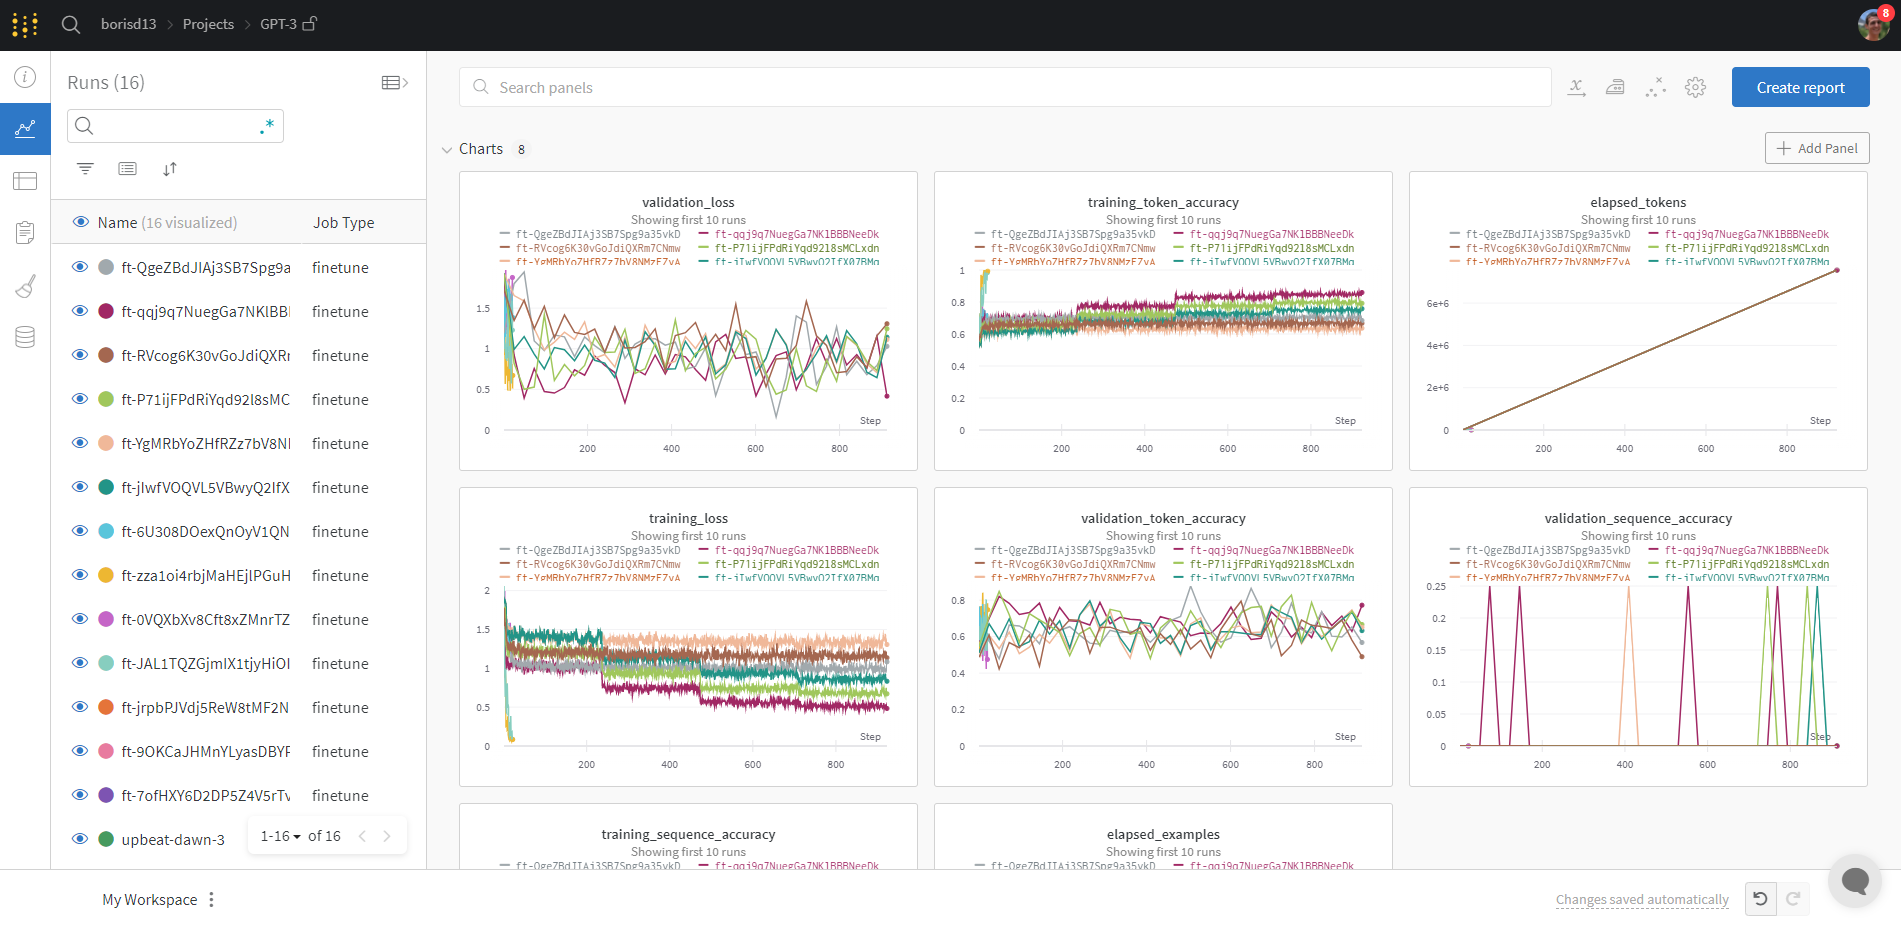

Anytime we have new fine-tunes, we can just call openai wandb sync to add them to our dashboard.

## Log inference samples

# The best way to evaluate a generative model is to explore sample predictions.

Let's generate a few inference samples and log them to W&B.

In [ ]:
# create eval job
run = wandb.init(project='GPT 3 for Mental Health FAQ', job_type='eval')
entity = wandb.run.entity

We can easily retrieve all config parameters from a job file.

Job files are logged to W&B as artifacts and can be accessed with `run.use_artifact('USERNAME/PROJECT/job_details:VERSION')` where `VERSION` is either:
* a version number such as `v2`
* the fine-tune id such as `ft-xxxxxxxxx`
* an alias added automatically such as `latest` or manually

You can explore them in your artifacts dashboard.

In [ ]:
# choose a fine-tuned model
artifact_job = run.use_artifact(f'{entity}/GPT 3 for Mental Health FAQ/fine_tune_details:v0', type='fine_tune_details')
artifact_job.metadata



{'id': 'ft-1C8LLD4N6iKw9UYQnPDggNhi',
 'model': 'davinci',
 'object': 'fine-tune',
 'status': 'succeeded',
 'created_at': 1668129399,
 'updated_at': 1668129723,
 'hyperparams': {'n_epochs': 4,
  'batch_size': 1,
  'prompt_loss_weight': 0.01,
  'learning_rate_multiplier': 0.1},
 'result_files': [{'id': 'file-G2XTyGqegHCFg9soB8p0Bptf',
   'bytes': 21448,
   'object': 'file',
   'status': 'processed',
   'purpose': 'fine-tune-results',
   'filename': 'compiled_results.csv',
   'created_at': 1668129722,
   'status_details': None}],
 'training_files': [{'id': 'file-VpaZwEbtBX0CsXS9LbpsioUm',
   'bytes': 166349,
   'object': 'file',
   'status': 'processed',
   'purpose': 'fine-tune',
   'filename': 'MentalHealthFAQFeatured_prepared.jsonl',
   'created_at': 1668129399,
   'status_details': None}],
 'organization_id': 'org-dbg111bJAji4M2aqzCYgruZO',
 'fine_tuned_model': 'davinci:ft-ipidevelop-2022-11-11-01-22-01',
 'validation_files': []}

Let's take advantage to add metadata into our eval run config.

In [ ]:
wandb.config.update({k:artifact_job.metadata[k] for k in ['fine_tuned_model', 'model', 'hyperparams']})

We can easily access model id from any job.

In [ ]:
fine_tuned_model = artifact_job.metadata['fine_tuned_model']
fine_tuned_model

'davinci:ft-ipidevelop-2022-11-11-01-22-01'

Loading validation data as dataframe

In [ ]:
df = pd.read_json("MentalHealthFAQFeatured_prepared.jsonl", orient='records', lines=True)
df.head()

prompt  \
0         Can you prevent mental health problems? ->   
1                  What is binge-eating disorder? ->   
2                     What causes mental illness? ->   
3           How can I pay for mental health care? ->   
4  Someone I love has been diagnosed with depress...   

                                          completion  
0   We can all suffer from mental health challeng...  
1   Binge-eating disorder or BED is a type of eat...  
2   It is estimated that mental illness affects 1...  
3   Mental health services provided through the g...  
4   We naturally want to help a loved one who isn...

We'll perform the inference on all 30 validation examples. 

In [ ]:
n_samples = 30
df = df.iloc[:n_samples]

In [ ]:
data = []

for _, row in tqdm(df.iterrows()):
    prompt = row['prompt']
    res = openai.Completion.create(model=fine_tuned_model, prompt=prompt, max_tokens=300, stop=[" END"])
    completion = res['choices'][0]['text']
    completion = completion[1:]       # remove initial space
    prompt = prompt[:-3]              # remove " ->"
    target = row['completion'][1:-4]  # remove initial space and "END"
    data.append([prompt, target, completion])

30it [03:09,  6.31s/it]


We create and log a W&B Table to easily explore, query & compare model predictions.

In [ ]:
prediction_table = wandb.Table(columns=['prompt', 'target', 'completion'], data=data)

In [ ]:
wandb.log({'predictions': prediction_table})

You can open the link to your run page down below. 

In [ ]:
wandb.finish() #work out a way to print the run page link

# Resources
https://wandb.ai/ivangoncharov/GPT-3%20to%20Generate%20Doctor%20Who%20Synopses?workspace=user-ivangoncharov